
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from matplotlib.colors import Colormap, ListedColormap

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

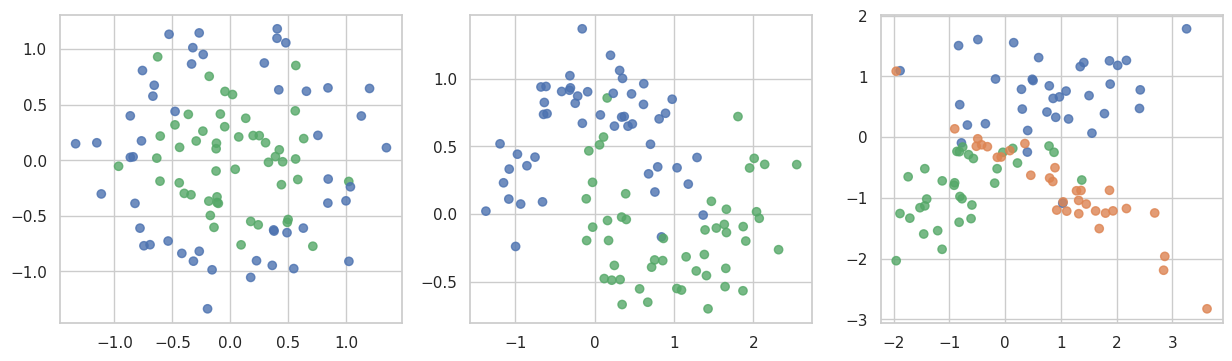

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

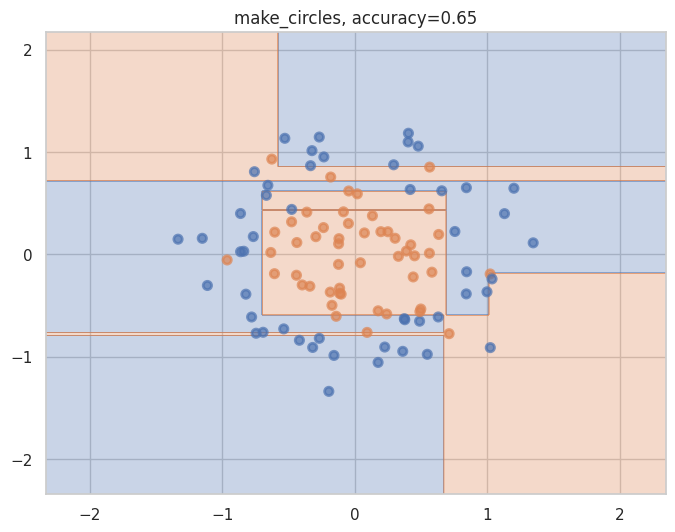

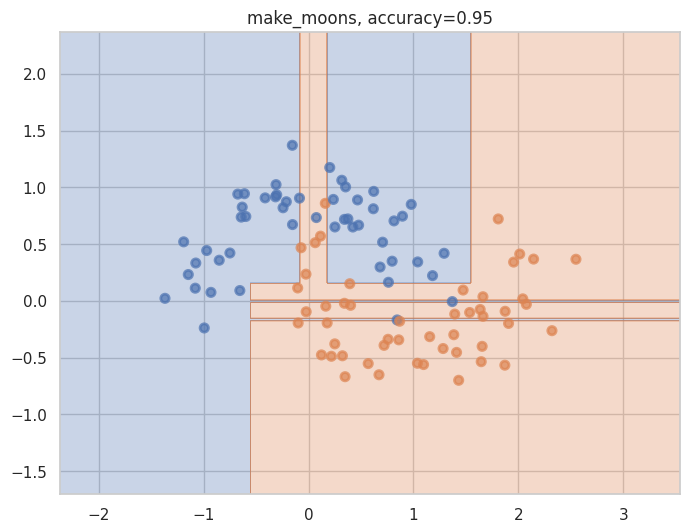

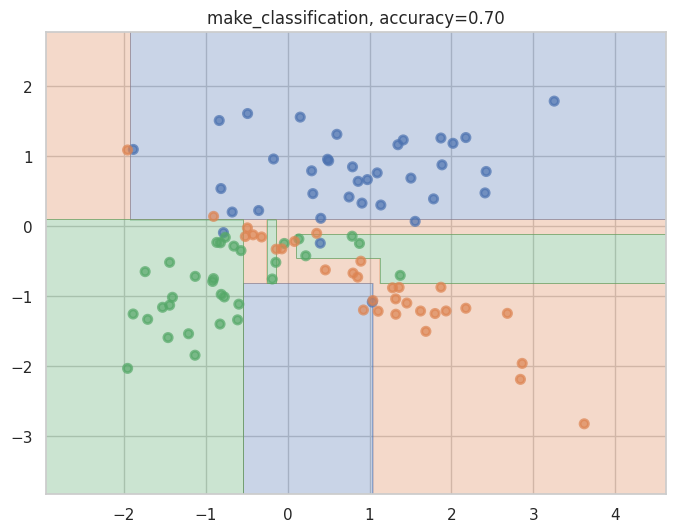

{'make_circles': (0.65, 1.0), 'make_moons': (0.95, 1.0), 'make_classification': (0.7, 1.0)}


In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

results = {}
names =['make_circles', 'make_moons', 'make_classification']

for i, dataset in enumerate(datasets):

    X, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[names[i]] = accuracy, accuracy_train

    plt.figure(figsize=(8, 6))
    plot_surface(clf, X, y)
    plt.title(f"{names[i]}, accuracy={accuracy:0.2f}")
    plt.show()

print(results)

__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Мы видим, что на всем тренировочных выборках модель показывает accuracy = 1.0, в то время как у на тестовых (для первой и третьей выборок) результаты значительно хуже. Так же мы видим, что разделяющие поверхности имеют сложную геометрическую форму. Не смотря на то, что accuracy для второй выборки 0,95, ее разделяющая поверхность также имеет сложную геометрическую форму, что свидетельствует о переобучении.



__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

max_depth=3, min_samples_leaf=1
Train Accuracy: 0.88, Test Accuracy: 0.70



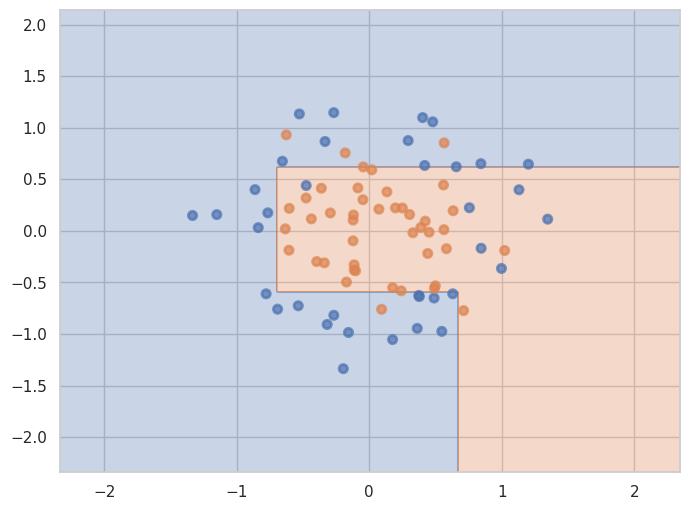

max_depth=3, min_samples_leaf=2
Train Accuracy: 0.86, Test Accuracy: 0.75



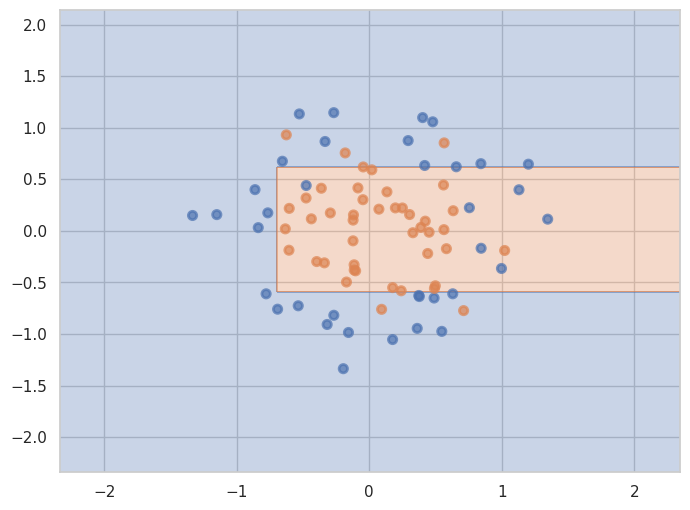

max_depth=3, min_samples_leaf=4
Train Accuracy: 0.86, Test Accuracy: 0.75



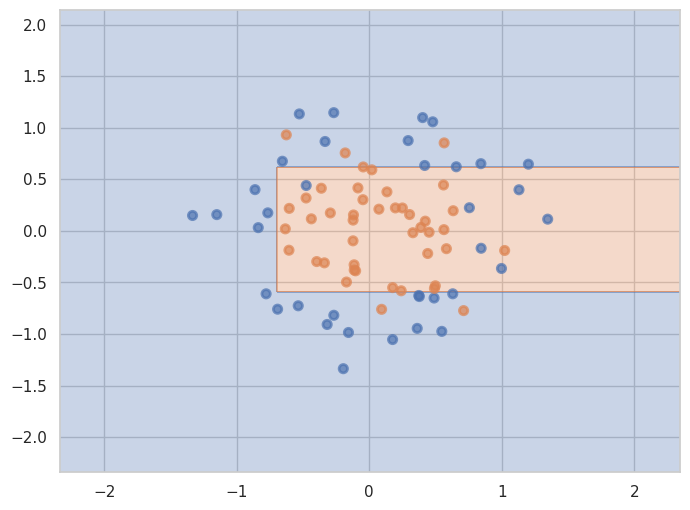

max_depth=3, min_samples_leaf=10
Train Accuracy: 0.82, Test Accuracy: 0.80



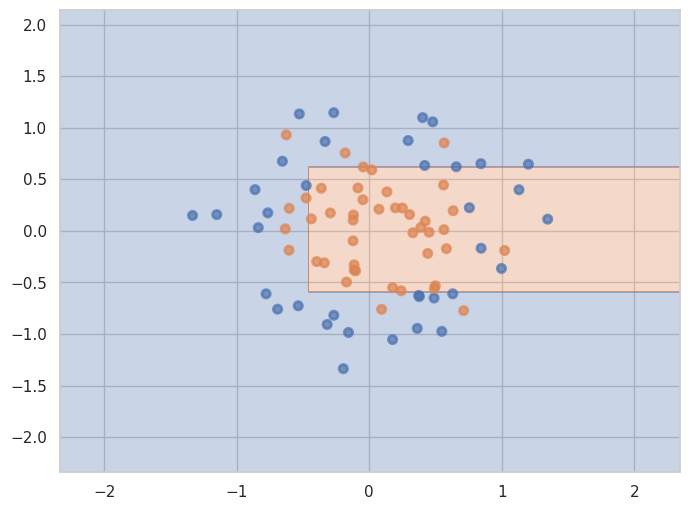

max_depth=5, min_samples_leaf=1
Train Accuracy: 0.97, Test Accuracy: 0.70



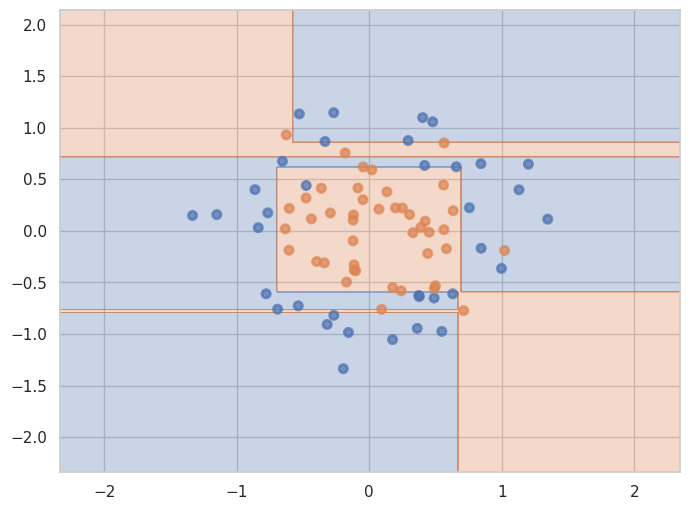

max_depth=5, min_samples_leaf=2
Train Accuracy: 0.94, Test Accuracy: 0.80



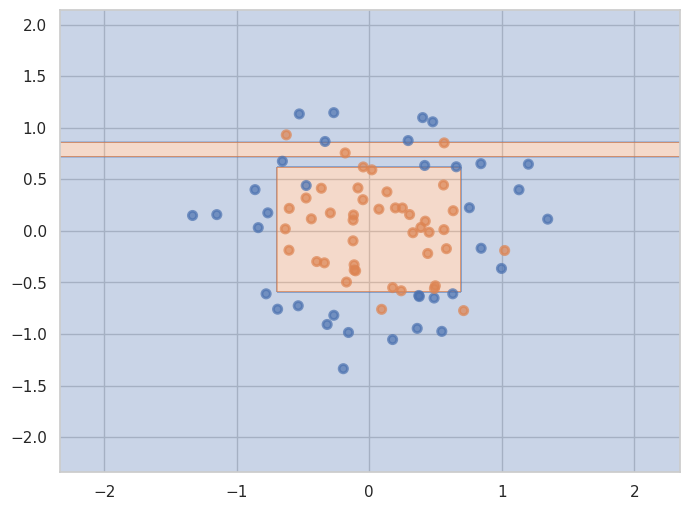

max_depth=5, min_samples_leaf=4
Train Accuracy: 0.93, Test Accuracy: 0.75



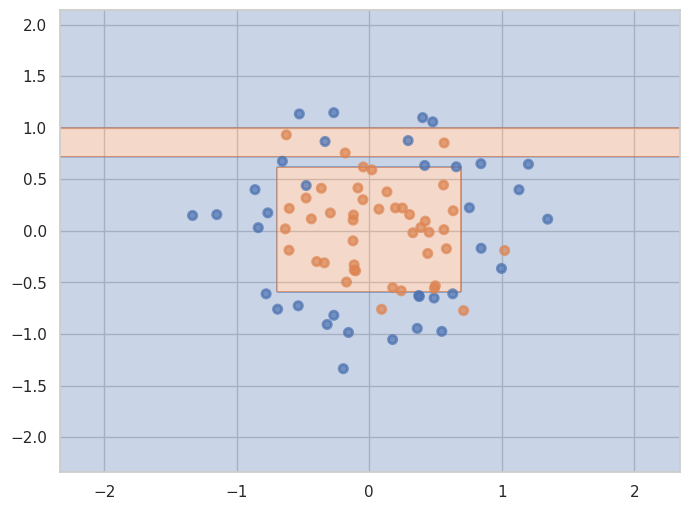

max_depth=5, min_samples_leaf=10
Train Accuracy: 0.82, Test Accuracy: 0.90



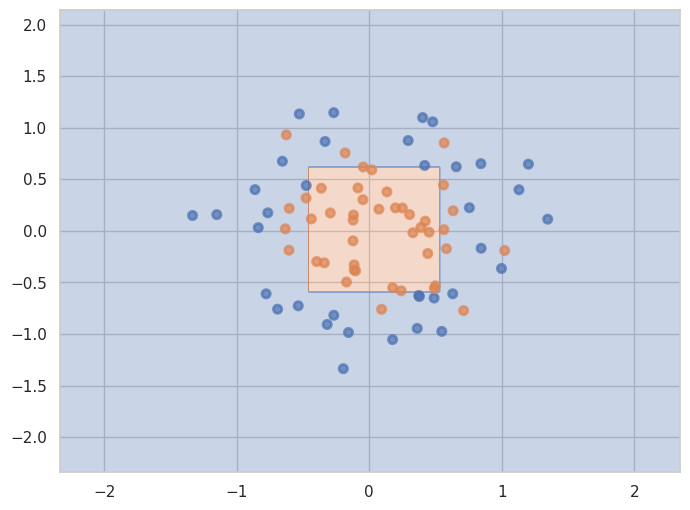

max_depth=7, min_samples_leaf=1
Train Accuracy: 1.00, Test Accuracy: 0.65



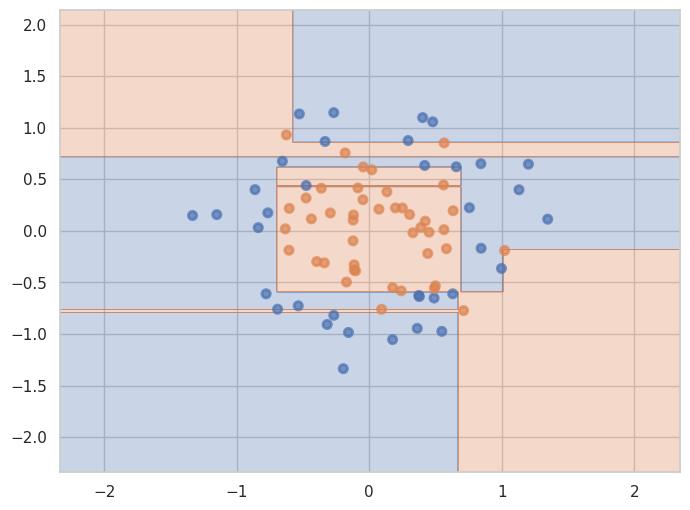

max_depth=7, min_samples_leaf=2
Train Accuracy: 0.94, Test Accuracy: 0.80



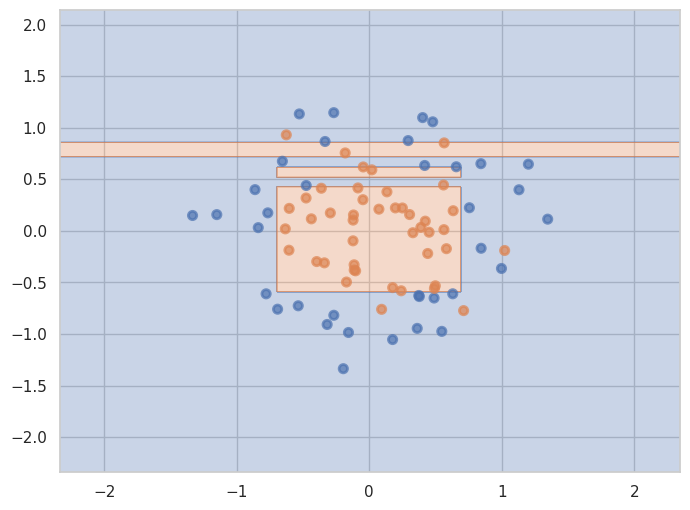

max_depth=7, min_samples_leaf=4
Train Accuracy: 0.93, Test Accuracy: 0.75



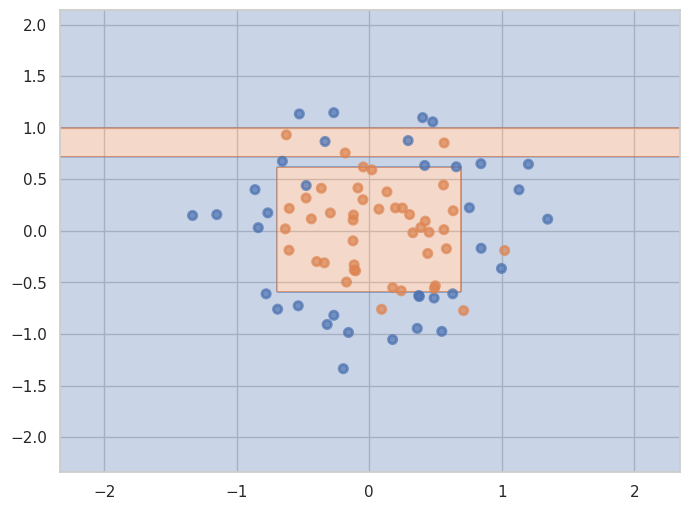

max_depth=7, min_samples_leaf=10
Train Accuracy: 0.82, Test Accuracy: 0.90



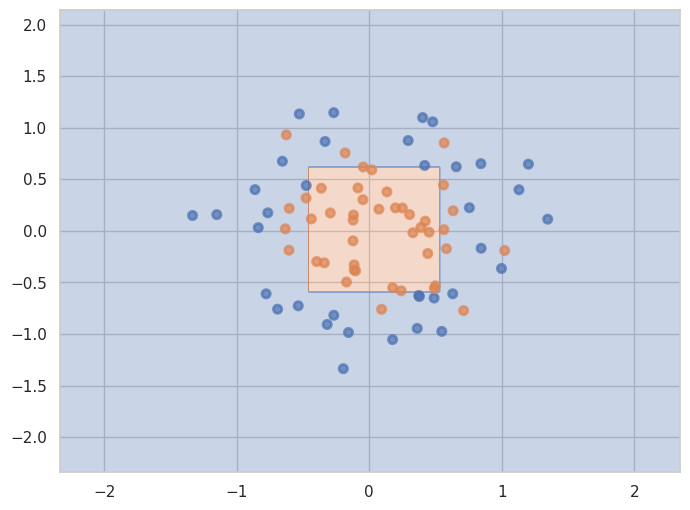

max_depth=10, min_samples_leaf=1
Train Accuracy: 1.00, Test Accuracy: 0.65



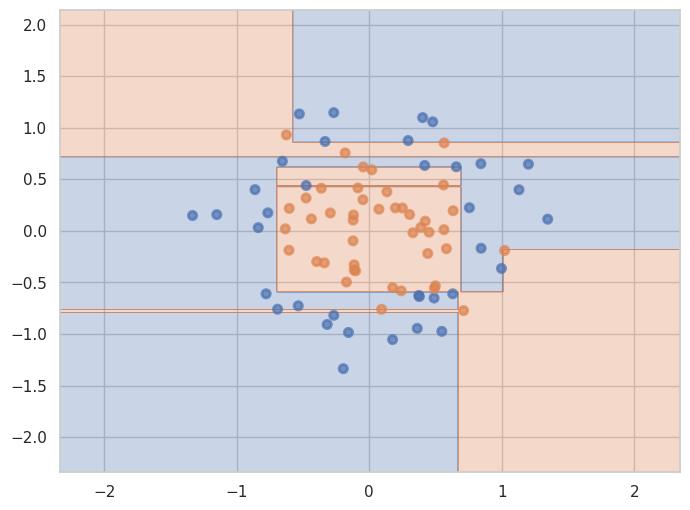

max_depth=10, min_samples_leaf=2
Train Accuracy: 0.94, Test Accuracy: 0.80



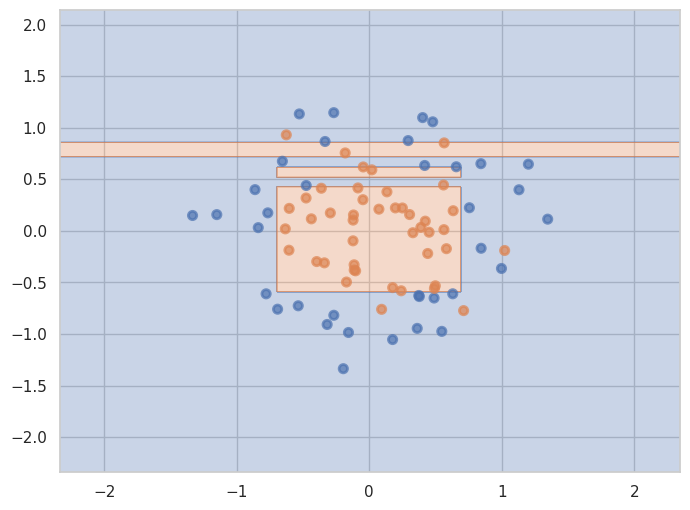

max_depth=10, min_samples_leaf=4
Train Accuracy: 0.93, Test Accuracy: 0.75



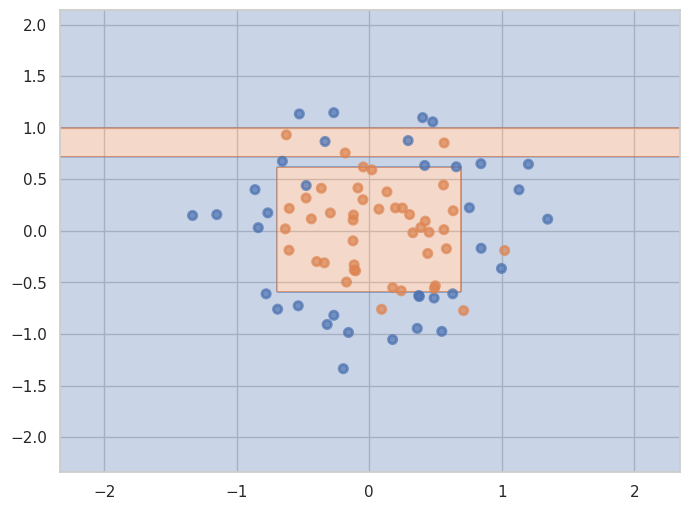

max_depth=10, min_samples_leaf=10
Train Accuracy: 0.82, Test Accuracy: 0.90



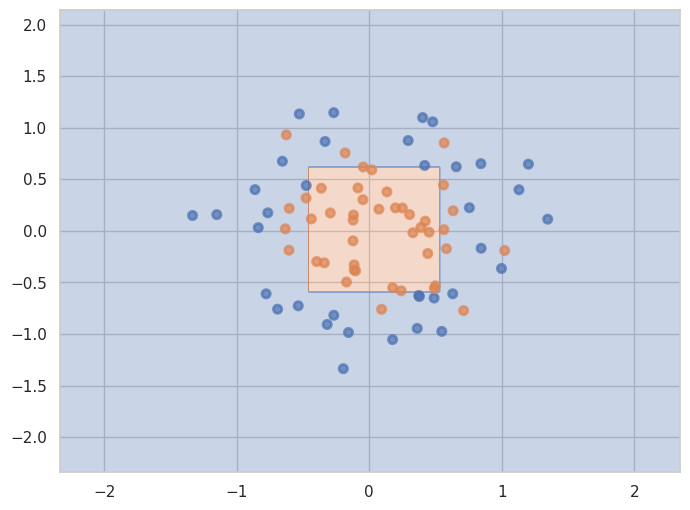

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

max_depth_values = [3, 5, 7, 10]
min_samples_leaf_values = [1, 2, 4, 10]

results = []

X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:

        # Обучаем дерево с перебираемыми гиперпараметрами
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
        clf.fit(X_train, y_train)

        train_accuracy = accuracy_score(y_train, clf.predict(X_train))
        test_accuracy = accuracy_score(y_test, clf.predict(X_test))

        results.append({
            "max_depth": max_depth,
            "min_samples_leaf": min_samples_leaf,
            "train_accuracy": train_accuracy,
            "test_accuracy": test_accuracy
        })

        print(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}")
        print(f"Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}\n")

        # Построение графика разделяющей поверхности
        plt.figure(figsize=(8, 6))
        plot_surface(clf, X_train, y_train)
        plt.show()


__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Мы видим, что при увеличении значения параметра max_depth разделяющая поверхность становится все более сложной геометрической формы. Это происходит, т.к. дерево начнает учитывать более сложные зависимости между признаками. При этом видно, что дерево переобучается, подстраиваясь под данные (например, max_depth=10, min_samples_leaf=1 - видна вертикальная полоса, где дерево подстроилось под две точки).

Так же мы видим, что для параметра min_samples_leaf при его увеличении происходит "сглаживание" разделяющей линии, модель перестает быть чувствительной к отдельным точкам и становится более устойчивой.

Это остается верным и для других наборов данных, с которыми мы работали (см. ниже)

max_depth=3, min_samples_leaf=1
Train Accuracy: 0.91, Test Accuracy: 1.00



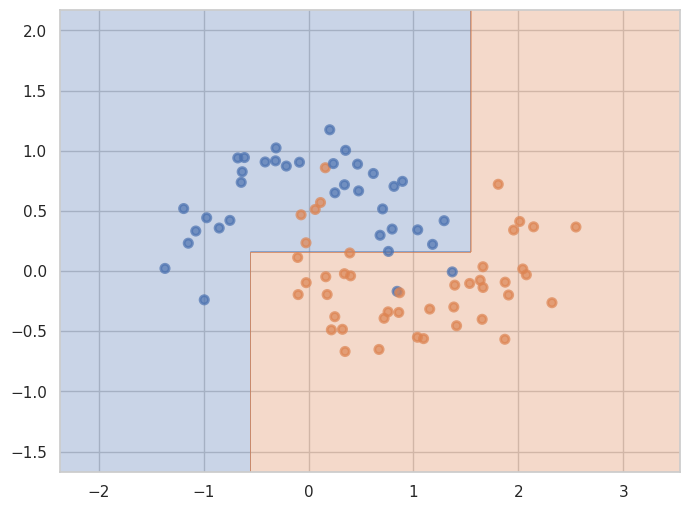

max_depth=3, min_samples_leaf=2
Train Accuracy: 0.91, Test Accuracy: 1.00



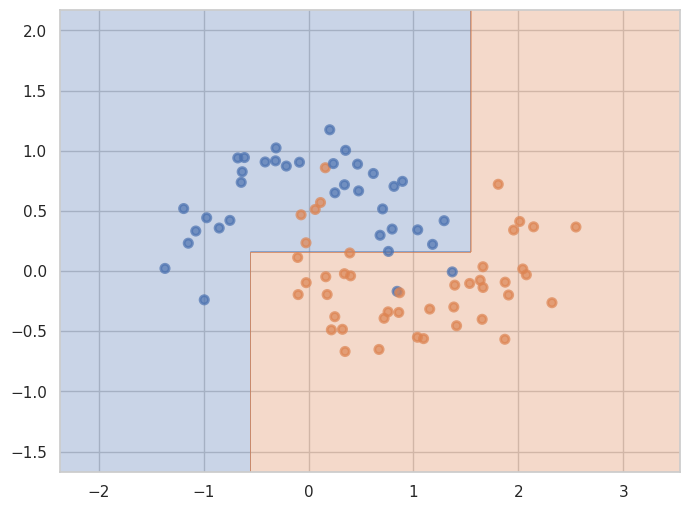

max_depth=3, min_samples_leaf=4
Train Accuracy: 0.89, Test Accuracy: 1.00



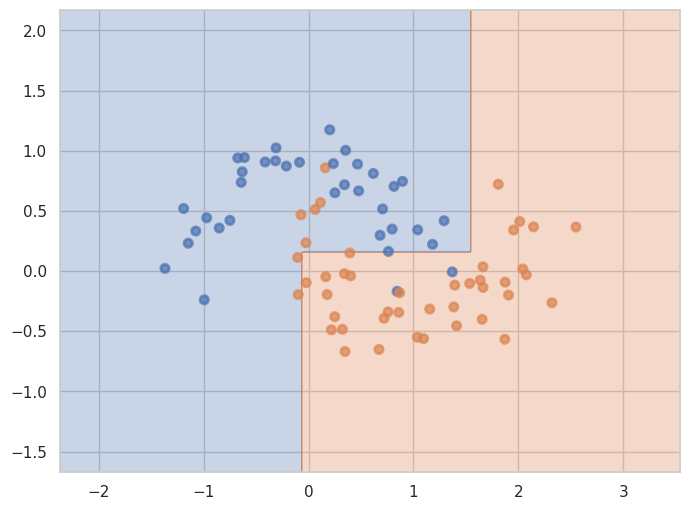

max_depth=3, min_samples_leaf=10
Train Accuracy: 0.84, Test Accuracy: 0.85



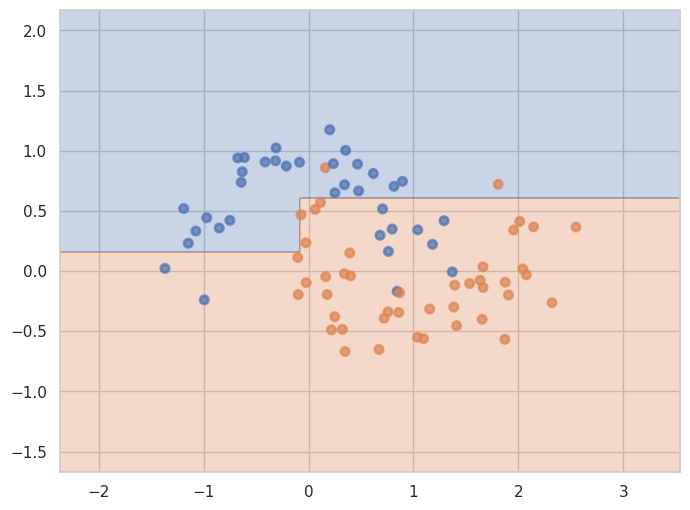

max_depth=5, min_samples_leaf=1
Train Accuracy: 0.99, Test Accuracy: 0.95



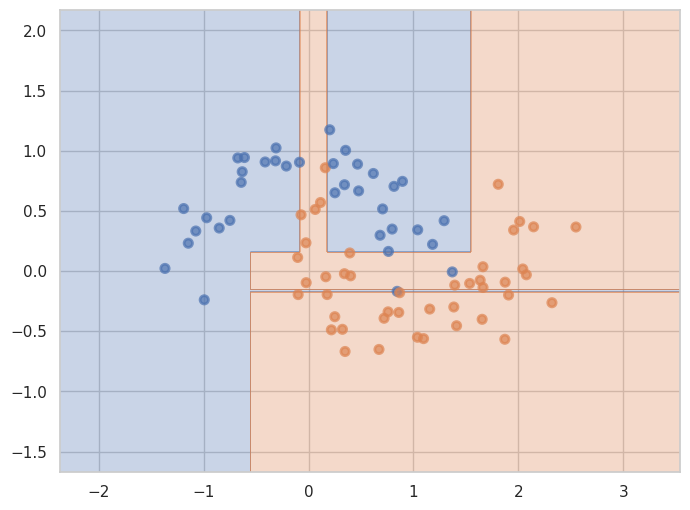

max_depth=5, min_samples_leaf=2
Train Accuracy: 0.97, Test Accuracy: 0.95



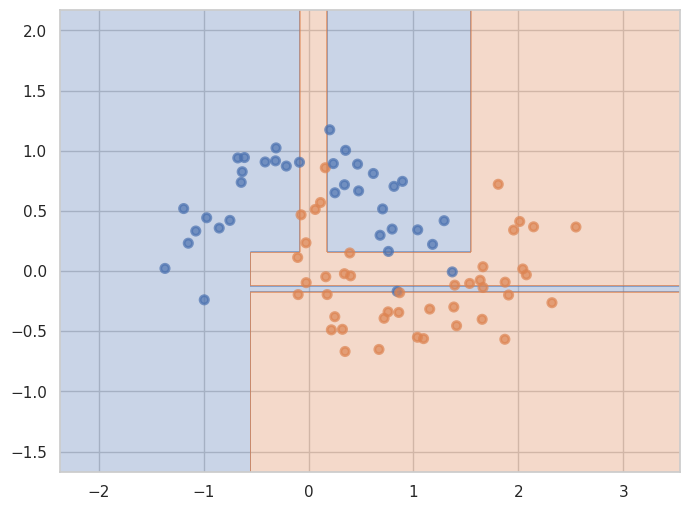

max_depth=5, min_samples_leaf=4
Train Accuracy: 0.95, Test Accuracy: 0.95



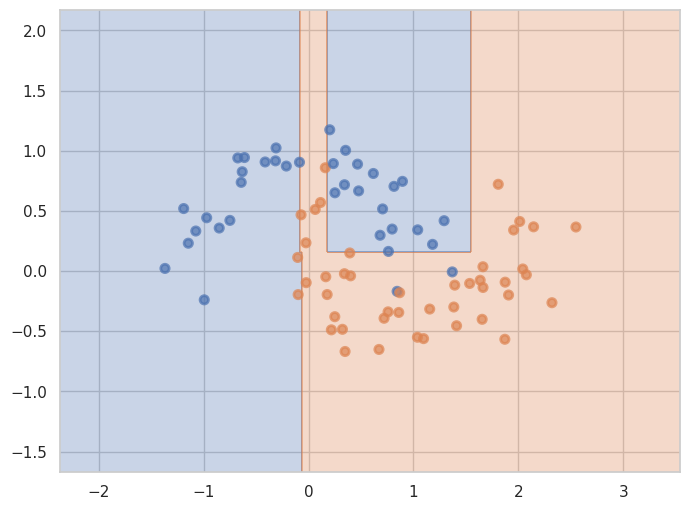

max_depth=5, min_samples_leaf=10
Train Accuracy: 0.84, Test Accuracy: 0.85



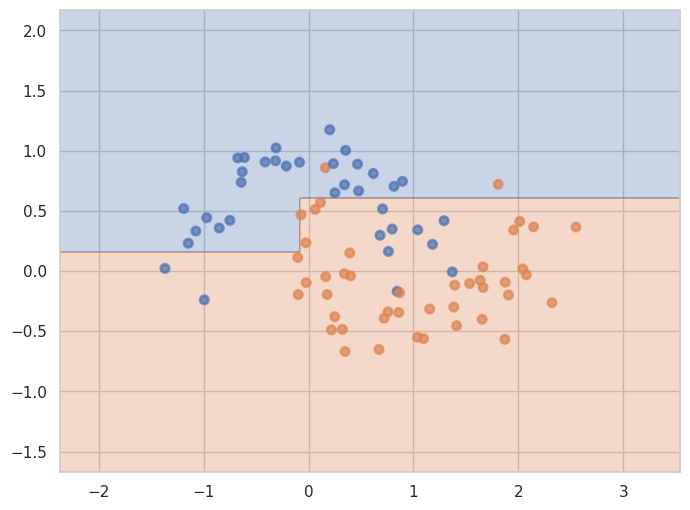

max_depth=7, min_samples_leaf=1
Train Accuracy: 1.00, Test Accuracy: 0.95



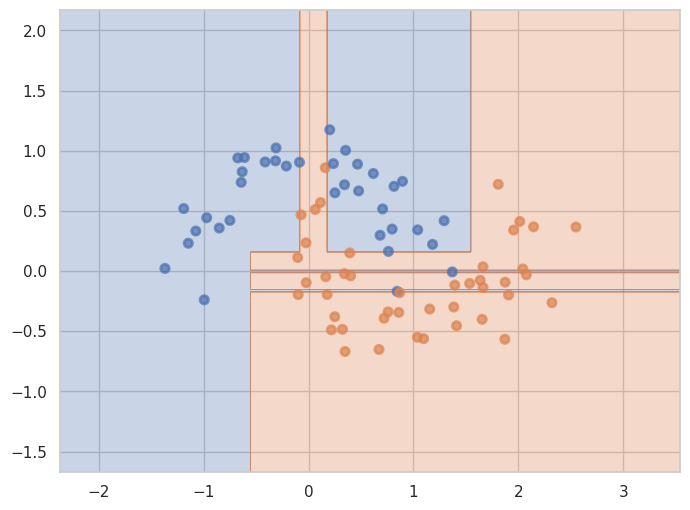

max_depth=7, min_samples_leaf=2
Train Accuracy: 0.97, Test Accuracy: 0.95



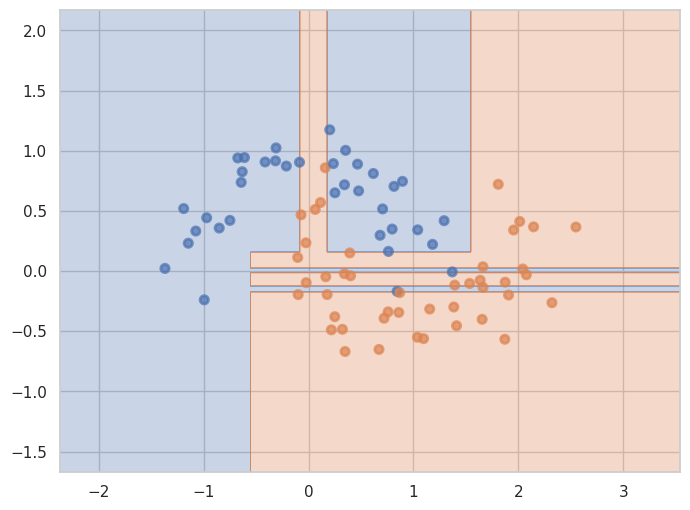

max_depth=7, min_samples_leaf=4
Train Accuracy: 0.95, Test Accuracy: 0.95



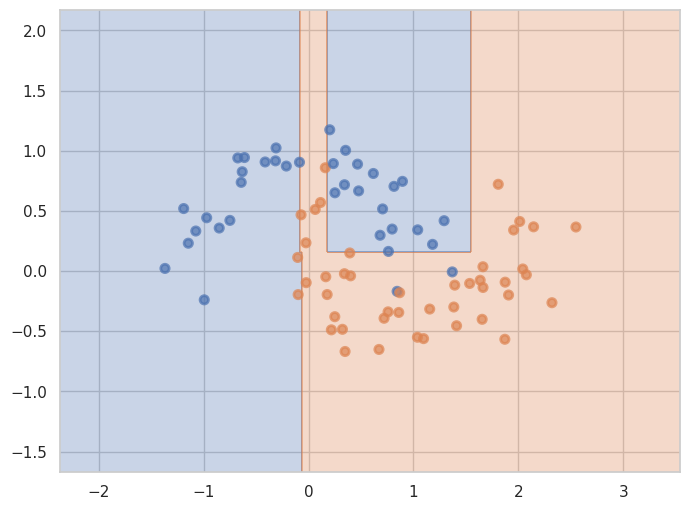

max_depth=7, min_samples_leaf=10
Train Accuracy: 0.84, Test Accuracy: 0.85



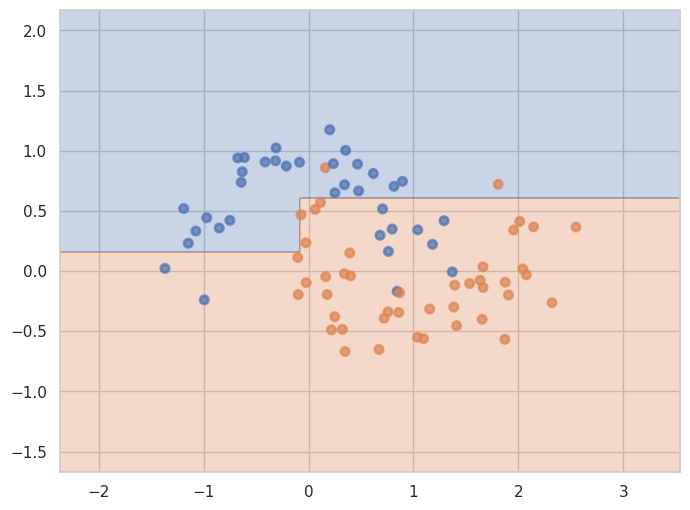

max_depth=10, min_samples_leaf=1
Train Accuracy: 1.00, Test Accuracy: 0.95



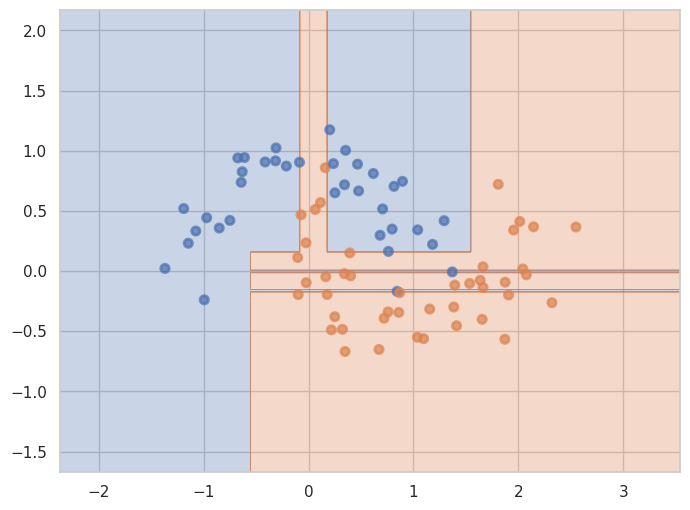

max_depth=10, min_samples_leaf=2
Train Accuracy: 0.97, Test Accuracy: 0.95



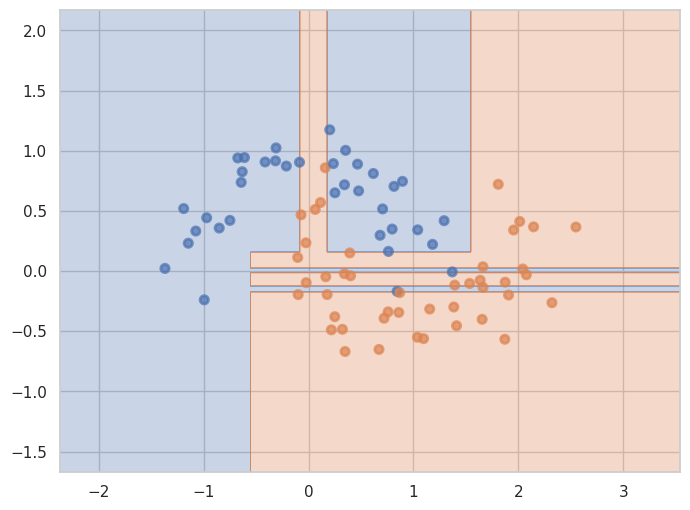

max_depth=10, min_samples_leaf=4
Train Accuracy: 0.95, Test Accuracy: 0.95



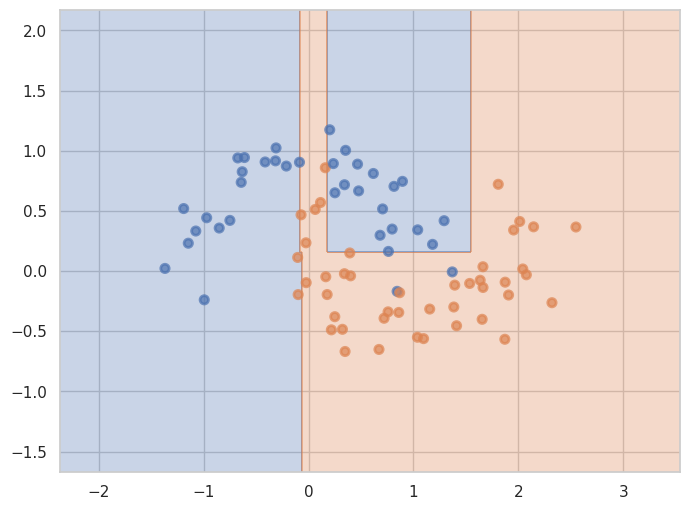

max_depth=10, min_samples_leaf=10
Train Accuracy: 0.84, Test Accuracy: 0.85



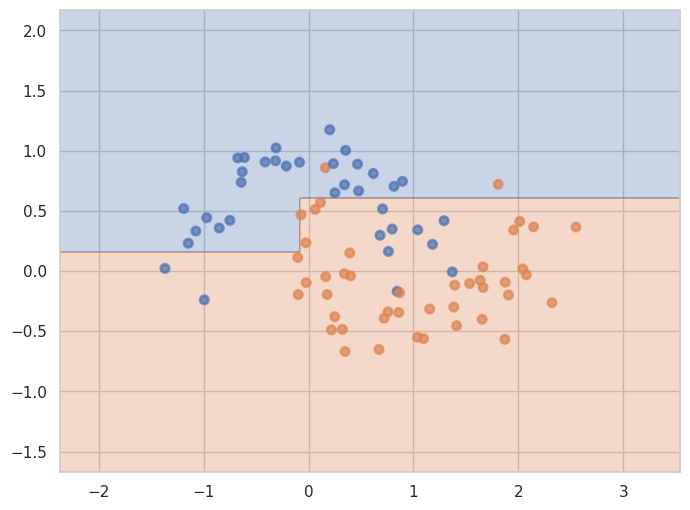

In [ ]:
results = []

X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:

        # Обучаем дерево с перебираемыми гиперпараметрами
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
        clf.fit(X_train, y_train)

        train_accuracy = accuracy_score(y_train, clf.predict(X_train))
        test_accuracy = accuracy_score(y_test, clf.predict(X_test))

        results.append({
            "max_depth": max_depth,
            "min_samples_leaf": min_samples_leaf,
            "train_accuracy": train_accuracy,
            "test_accuracy": test_accuracy
        })

        print(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}")
        print(f"Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}\n")

        # Построение графика разделяющей поверхности
        plt.figure(figsize=(8, 6))
        plot_surface(clf, X_train, y_train)
        plt.show()


max_depth=3, min_samples_leaf=1
Train Accuracy: 0.90, Test Accuracy: 0.75



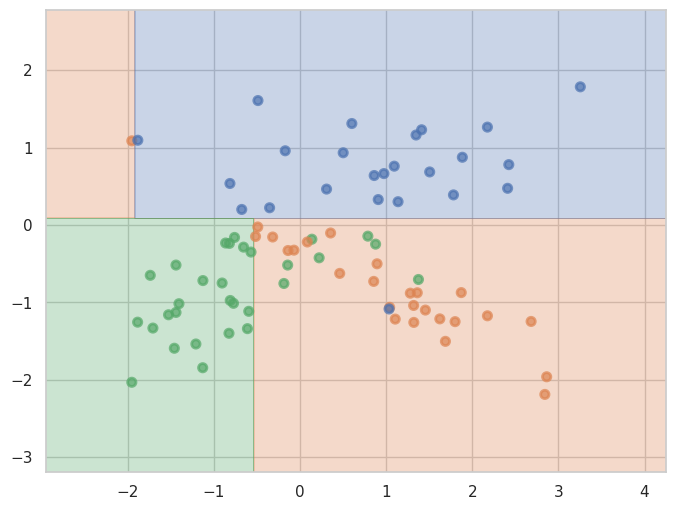

max_depth=3, min_samples_leaf=2
Train Accuracy: 0.89, Test Accuracy: 0.75



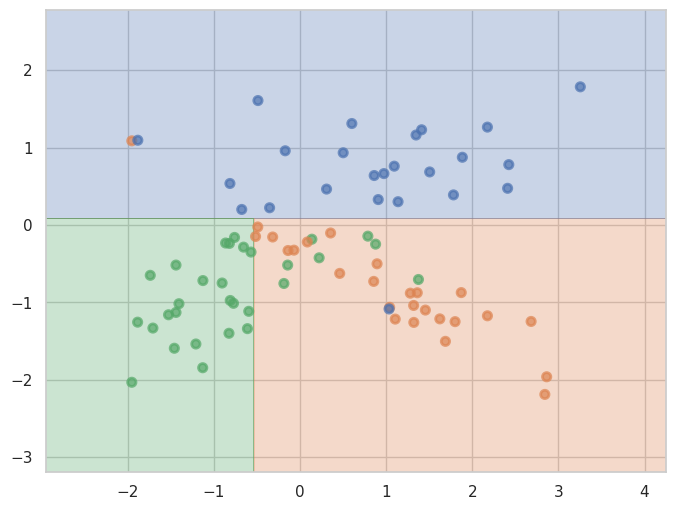

max_depth=3, min_samples_leaf=4
Train Accuracy: 0.89, Test Accuracy: 0.75



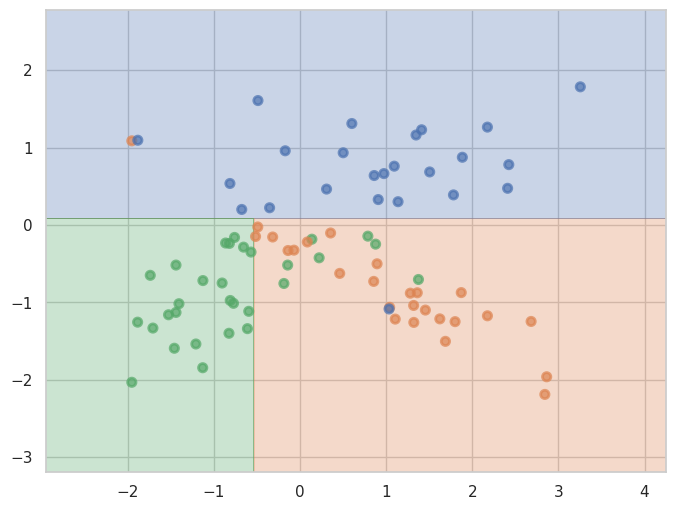

max_depth=3, min_samples_leaf=10
Train Accuracy: 0.89, Test Accuracy: 0.75



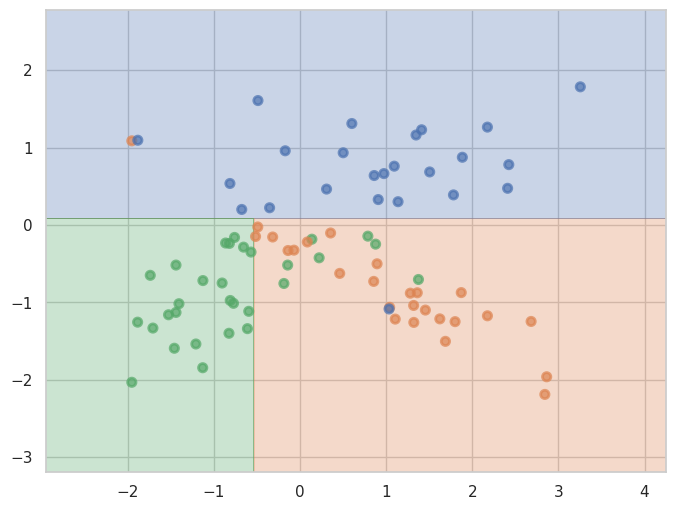

max_depth=5, min_samples_leaf=1
Train Accuracy: 0.94, Test Accuracy: 0.70



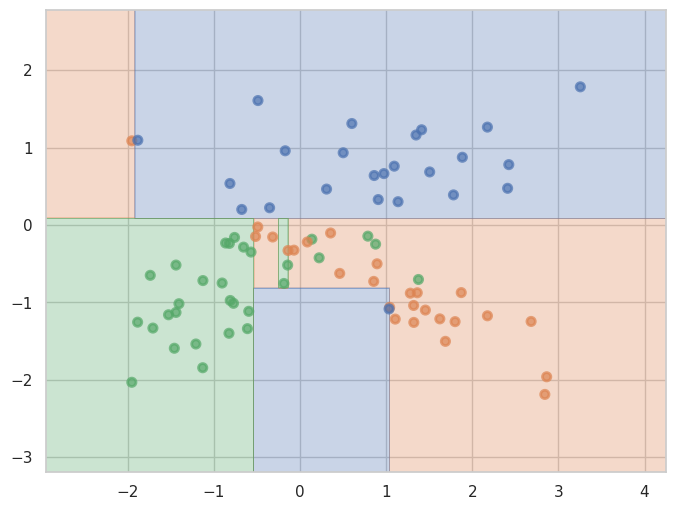

max_depth=5, min_samples_leaf=2
Train Accuracy: 0.91, Test Accuracy: 0.70



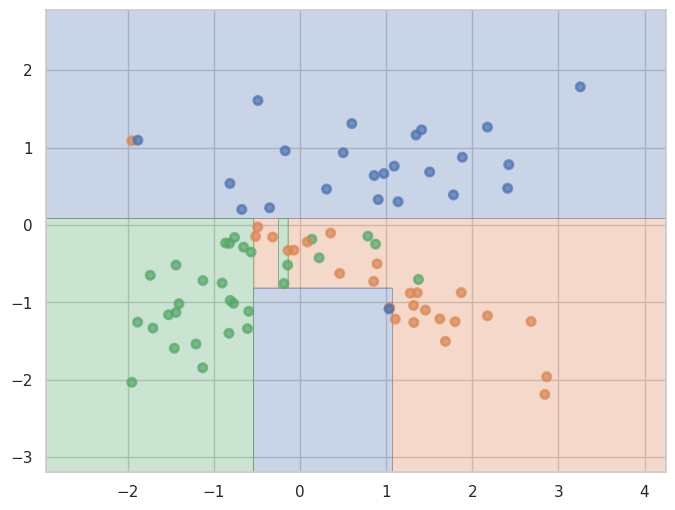

max_depth=5, min_samples_leaf=4
Train Accuracy: 0.93, Test Accuracy: 0.75



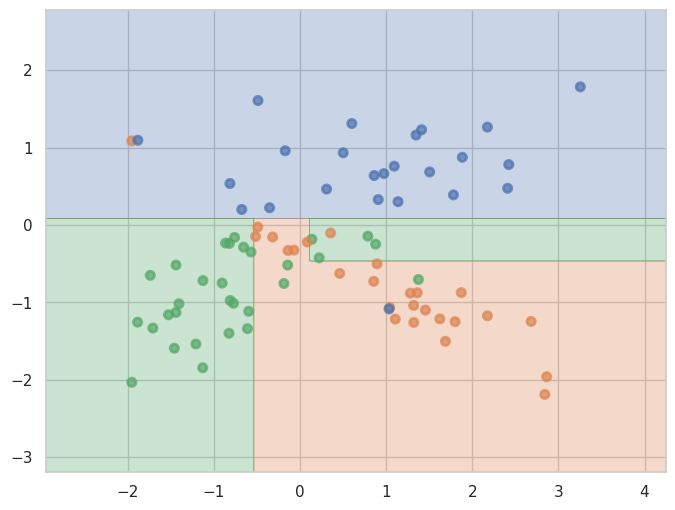

max_depth=5, min_samples_leaf=10
Train Accuracy: 0.89, Test Accuracy: 0.75



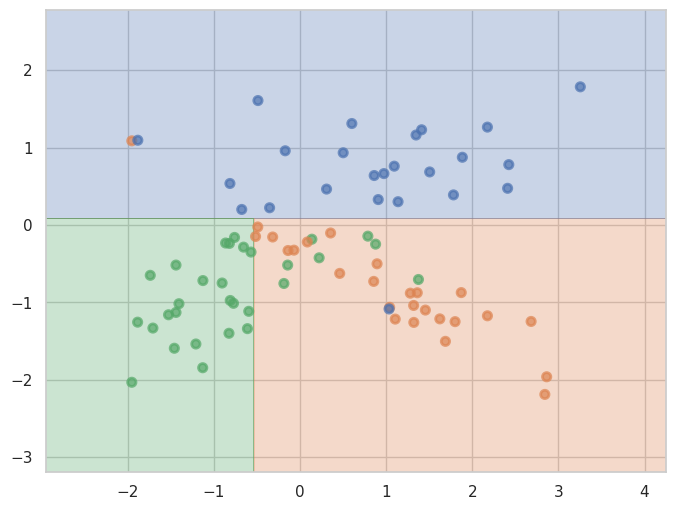

max_depth=7, min_samples_leaf=1
Train Accuracy: 0.97, Test Accuracy: 0.70



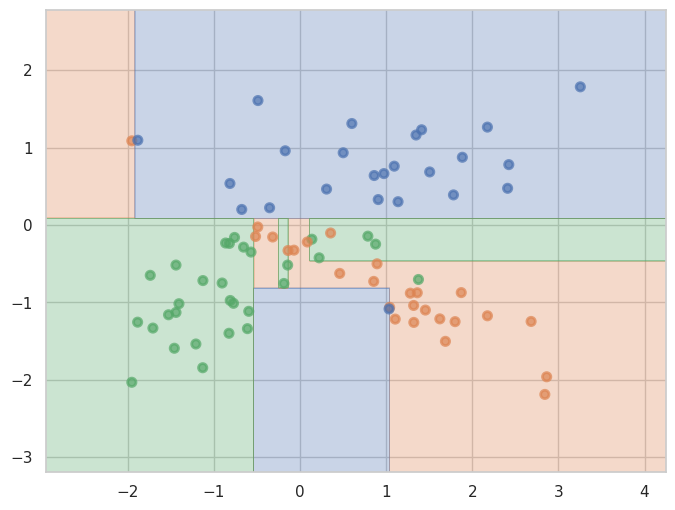

max_depth=7, min_samples_leaf=2
Train Accuracy: 0.95, Test Accuracy: 0.70



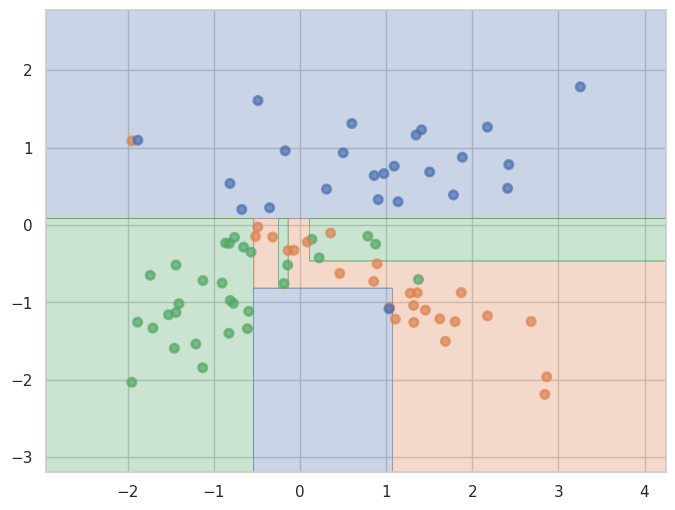

max_depth=7, min_samples_leaf=4
Train Accuracy: 0.93, Test Accuracy: 0.75



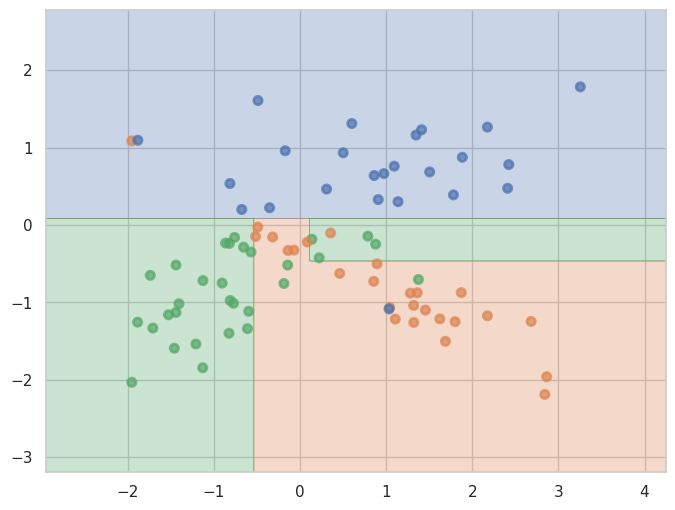

max_depth=7, min_samples_leaf=10
Train Accuracy: 0.89, Test Accuracy: 0.75



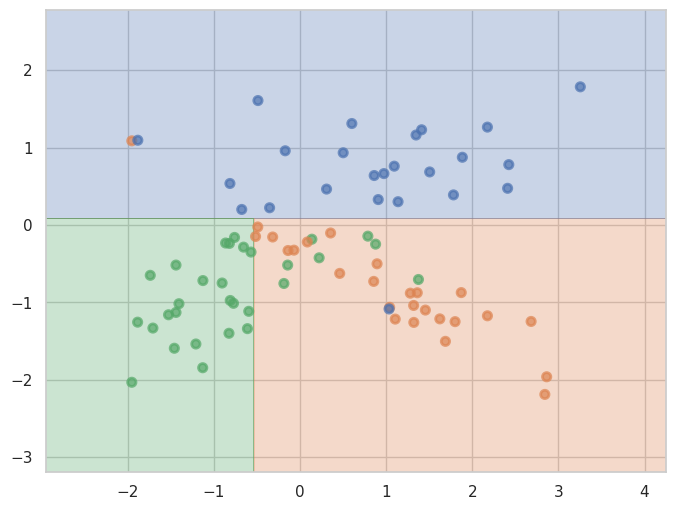

max_depth=10, min_samples_leaf=1
Train Accuracy: 1.00, Test Accuracy: 0.70



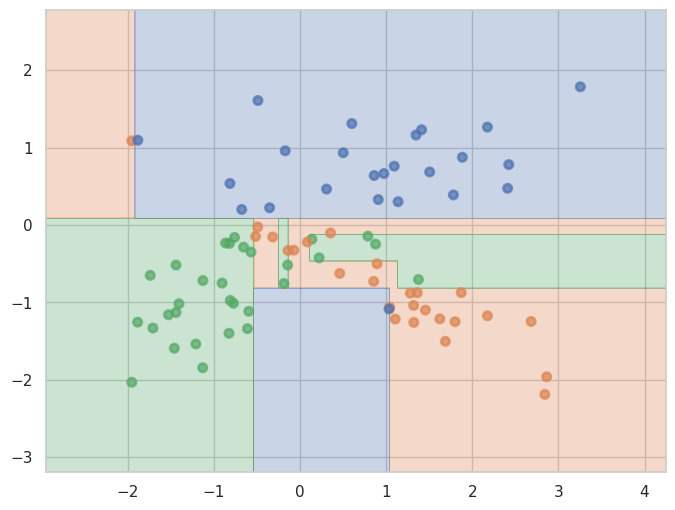

max_depth=10, min_samples_leaf=2
Train Accuracy: 0.95, Test Accuracy: 0.70



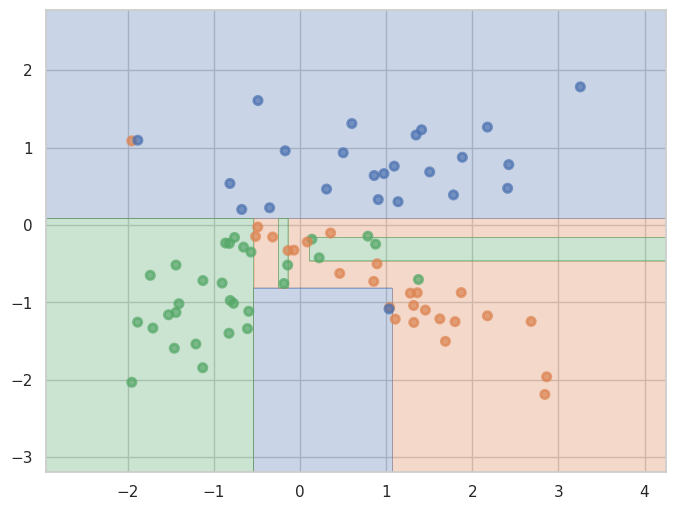

max_depth=10, min_samples_leaf=4
Train Accuracy: 0.93, Test Accuracy: 0.75



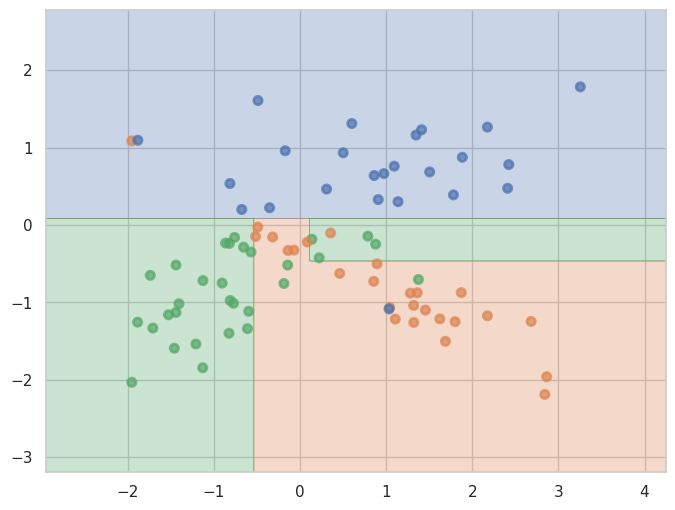

max_depth=10, min_samples_leaf=10
Train Accuracy: 0.89, Test Accuracy: 0.75



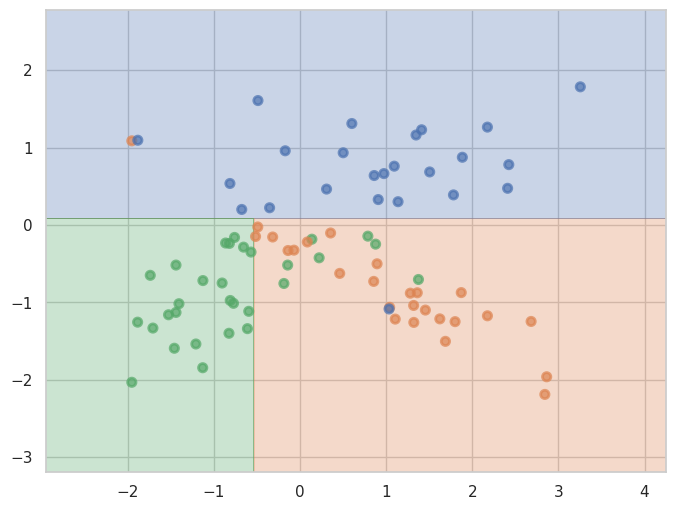

In [ ]:
results = []

X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:

        # Обучаем дерево с перебираемыми гиперпараметрами
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
        clf.fit(X_train, y_train)

        train_accuracy = accuracy_score(y_train, clf.predict(X_train))
        test_accuracy = accuracy_score(y_test, clf.predict(X_test))

        results.append({
            "max_depth": max_depth,
            "min_samples_leaf": min_samples_leaf,
            "train_accuracy": train_accuracy,
            "test_accuracy": test_accuracy
        })

        print(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}")
        print(f"Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}\n")

        # Построение графика разделяющей поверхности
        plt.figure(figsize=(8, 6))
        plot_surface(clf, X_train, y_train)
        plt.show()


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

In [ ]:
'''

def gini_impurity(y):

    """Вычисляет критерий Джини для вектора классов y."""

    _, counts = np.unique(y, return_counts=True)
    proportions = counts / len(y)
    return 1 - np.sum(proportions**2)

def find_best_split(feature_vector, target_vector):

    """
    Находит оптимальный порог для разбиения вектора признака по критерию Джини.

    Критерий Джини определяется следующим образом:
    .. math::
        Q(R) = -\\frac {|R_l|}{|R|}H(R_l) -\\frac {|R_r|}{|R|}H(R_r),

    где:
    * :math:`R` — множество всех объектов,
    * :math:`R_l` и :math:`R_r` — объекты, попавшие в левое и правое поддерево соответственно.

    Функция энтропии :math:`H(R)`:
    .. math::
        H(R) = 1 - p_1^2 - p_0^2,

    где:
    * :math:`p_1` и :math:`p_0` — доля объектов класса 1 и 0 соответственно.

    Указания:
    - Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    - В качестве порогов, нужно брать среднее двух соседних (при сортировке) значений признака.
    - Поведение функции в случае константного признака может быть любым.
    - При одинаковых приростах Джини нужно выбирать минимальный сплит.
    - Для оптимизации рекомендуется использовать векторизацию вместо циклов.

    Parameters
    ----------
    feature_vector : np.ndarray
        Вектор вещественнозначных значений признака.
    target_vector : np.ndarray
        Вектор классов объектов (0 или 1), длина `feature_vector` равна длине `target_vector`.

    Returns
    -------
    thresholds : np.ndarray
        Отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно разделить на
        два различных поддерева.
    ginis : np.ndarray
        Вектор со значениями критерия Джини для каждого порога в `thresholds`.
    threshold_best : float
        Оптимальный порог для разбиения.
    gini_best : float
        Оптимальное значение критерия Джини."""

    # Сортируем
    sorted_indices = np.argsort(feature_vector)
    feature_sorted = feature_vector[sorted_indices]
    target_sorted = target_vector[sorted_indices]

    thresholds = (feature_sorted[:-1] + feature_sorted[1:]) / 2

    # Создаем массивы для левых и правых подмножеств
    left_target = np.cumsum(target_sorted[:-1])
    right_target = np.sum(target_sorted) - left_target

    left_size = np.arange(1, len(feature_sorted))
    right_size = len(feature_sorted) - left_size

    # Вычисляем критерий Джини для каждого порога
    gini_left = 1 - (left_target / left_size) ** 2 - ((left_size - left_target) / left_size) ** 2
    gini_right = 1 - (right_target / right_size) ** 2 - ((right_size - right_target) / right_size) ** 2

    # Критерий Джини
    ginis = (left_size / len(feature_sorted)) * gini_left + (right_size / len(feature_sorted)) * gini_right

    best_index = np.argmin(ginis)
    threshold_best = thresholds[best_index]
    gini_best = ginis[best_index]

    return thresholds, ginis, threshold_best, gini_best


'''

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
from tree_code import find_best_split
import gdown
students = 'student.cvs'
gdown.download('https://drive.google.com/uc?export=download&id=14mC_KsEg2M7oTL_T6gW4KULSxAWeFxvJ', students, quiet=False)

df = pd.read_csv(students)
df.head()

Downloading...
From: https://drive.google.com/uc?export=download&id=14mC_KsEg2M7oTL_T6gW4KULSxAWeFxvJ
To: /content/student.cvs
100%|██████████| 7.25k/7.25k [00:00<00:00, 6.72MB/s]


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [ ]:
y = df['UNS']
X = df.drop(columns=['UNS'])

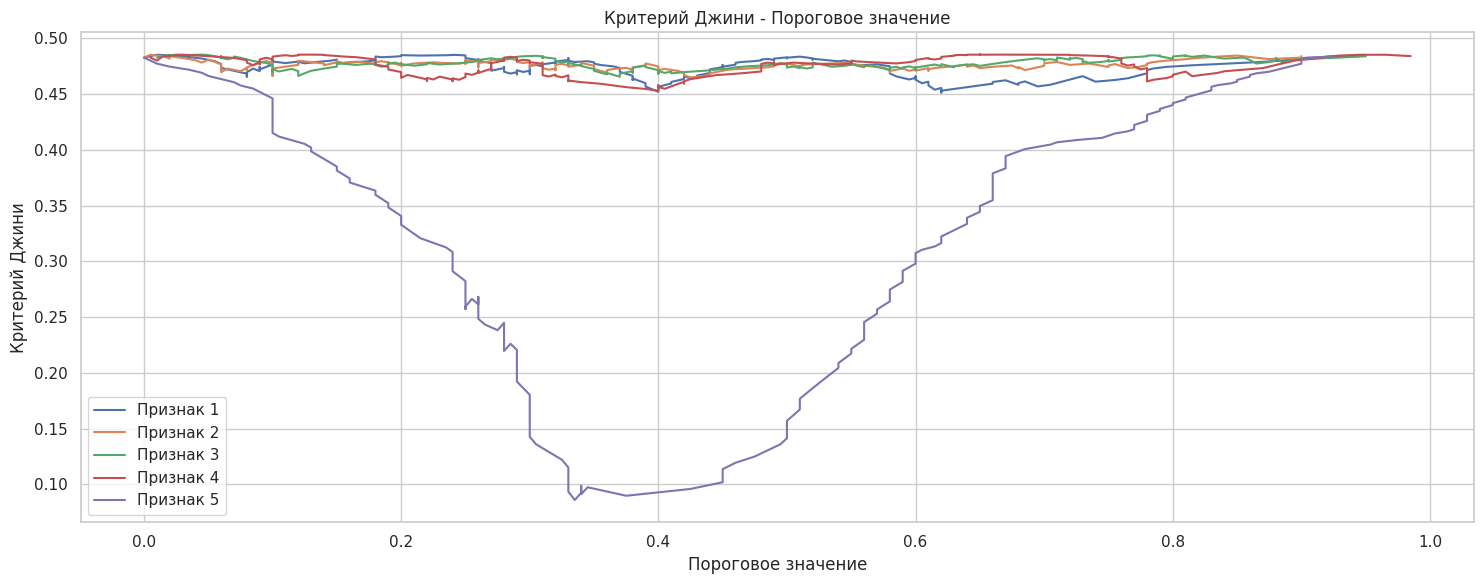

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 6))

thresholds_all = []
ginis_all = []

# Строим кривые для каждого признака
for i in range(X.shape[1]):
    feature_vector = X.iloc[:, i].values

    thresholds, ginis, threshold_best, gini_best = find_best_split(feature_vector, y)

    thresholds_all.append(thresholds)
    ginis_all.append(ginis)

    axes.plot(thresholds, ginis, label=f"Признак {i+1}")

axes.set_title("Критерий Джини - Пороговое значение")
axes.set_xlabel("Пороговое значение")
axes.set_ylabel("Критерий Джини")
axes.legend()

plt.tight_layout()
plt.show()

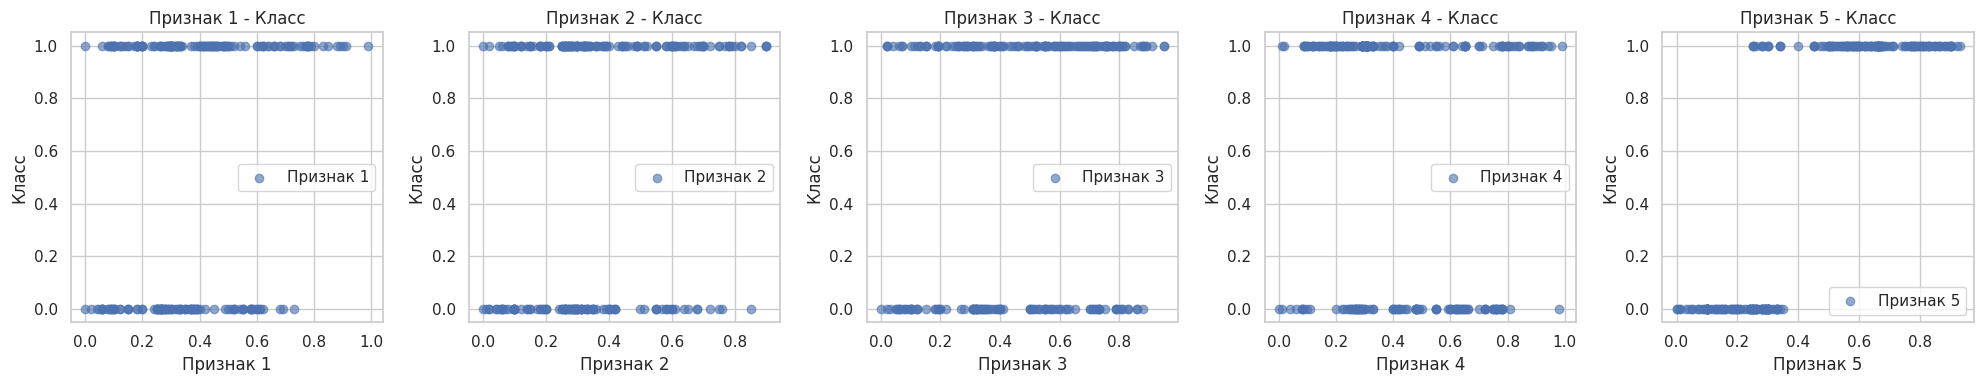

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Строим scatter-графики для каждого признака
for i in range(X.shape[1]):

    feature_vector = X.iloc[:, i].values


    axes[i].scatter(feature_vector, y, alpha=0.6, label=f"Признак {i+1}")
    axes[i].set_title(f"Признак {i+1} - Класс")
    axes[i].set_xlabel(f"Признак {i+1}")
    axes[i].set_ylabel("Класс")
    axes[i].legend()


plt.tight_layout()
plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

На основании кривых критерия Джинни выборку стоит разделить по пятому признаку (PEG), т.к. в этом случае достигается оптимальное разбиение данных на классы (критерий Джини достигает минимума в немного меньше, чем 0,1.

Да, совпадает с визуальной оценкой scatter-графиков: на пятом графике мы видим более четкое разделение признаков по классам.

Для "хороших" признаков кривая критерия Джини будет иметь либо постоянно низкие значения, либо же иметь пики (плато), в которых значение критерия Джини приближается к нулю (т.е. объекты классов 1 и 0 почти полностью разделены). Кривая для признаков, разделение по которым будет практически невозможно, будет иметь приблизительно постоянное значение для всех порогов. При этом ее значение будет высоким.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




In [ ]:
'''
from collections import Counter

class DecisionTree:
    def __init__(
        self,
        feature_types,
        max_depth=None,
        min_samples_split=None,
        min_samples_leaf=None,
    ):
        if any(ft not in {"real", "categorical"} for ft in feature_types):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

        ###
    def get_params(self, deep=True):
        """возвращает параметры, чтобы работать с кросс-валидацией skl"""
        return {
            'feature_types': self._feature_types,
            'max_depth': self._max_depth,
            'min_samples_split': self._min_samples_split,
            'min_samples_leaf': self._min_samples_leaf,
        }


    def _fit_node(self, sub_X, sub_y, node, current_depth=0):
    #def _fit_node(self, sub_X, sub_y, node):
        """
        Обучение узла дерева решений.

        Если все элементы в подвыборке принадлежат одному классу, узел становится терминальным.

        Parameters
        ----------
        sub_X : np.ndarray
            Подвыборка признаков.
        sub_y : np.ndarray
            Подвыборка меток классов.
        node : dict
            Узел дерева, который будет заполнен информацией о разбиении.

        """
        # проверка терминальности узла

        if len(sub_y) > 0 and np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return


        # проверка на пустые подвыборки
        if len(sub_y) == 0:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0] if len(sub_y) > 0 else None
            return


        # Проверка на максимальную глубину
        if self._max_depth is not None and current_depth >= self._max_depth:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        # инициализируем переменные
        feature_best, threshold_best, gini_best, split = None, None, None, None

        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature]) # частота категорий
                clicks = Counter(sub_X[sub_y == 1, feature]) # число меток 1
                ratio = {
                    key: clicks.get(key, 0) / count for key, count in counts.items()
                    }

                sorted_categories = sorted(ratio, key=ratio.get)
                categories_map = {
                    category: i for i, category in enumerate(sorted_categories)
                }

                feature_vector = np.vectorize(categories_map.get)(sub_X[:, feature])
            else:
                raise ValueError("Некорректный тип признака")

            # Пропускаем признаки с малой вариативностью
            if len(np.unique(feature_vector)) <= 1:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)

            #if gini_best is None or gini > gini_best:
            if gini_best is None or gini < gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = [
                        k for k, v in categories_map.items() if v < threshold
                    ]


        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best

        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError("Некорректный тип признака")

        # Рекурсивно разбиваем данные
        node["left_child"], node["right_child"] = {}, {}
        #self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        #self._fit_node(sub_X[~split], sub_y[~split], node["right_child"])
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], current_depth + 1)
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"], current_depth + 1)

    def _predict_node(self, x, node):
        """
        Рекурсивное предсказание класса для одного объекта по узлу дерева решений.

        Если узел терминальный, возвращается предсказанный класс.
        Если узел не терминальный, выборка передается в соответствующее поддерево для дальнейшего предсказания.

        Parameters
        ----------
        x : np.ndarray
            Вектор признаков одного объекта.
        node : dict
            Узел дерева решений.

        Returns
        -------
        int
            Предсказанный класс объекта.
        """
        # ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
        # проверка терминальности узла
        if node["type"] == "terminal":
            return node["class"]

        feature_split = node["feature_split"]

        if self._feature_types[feature_split] == "real":

            threshold = node["threshold"]
            if x[feature_split] < threshold:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

        elif self._feature_types[feature_split] == "categorical":

            categories_split = node["categories_split"]
            if x[feature_split] in categories_split:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

        else:
            raise ValueError("Некорректный тип признака")

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)
'''


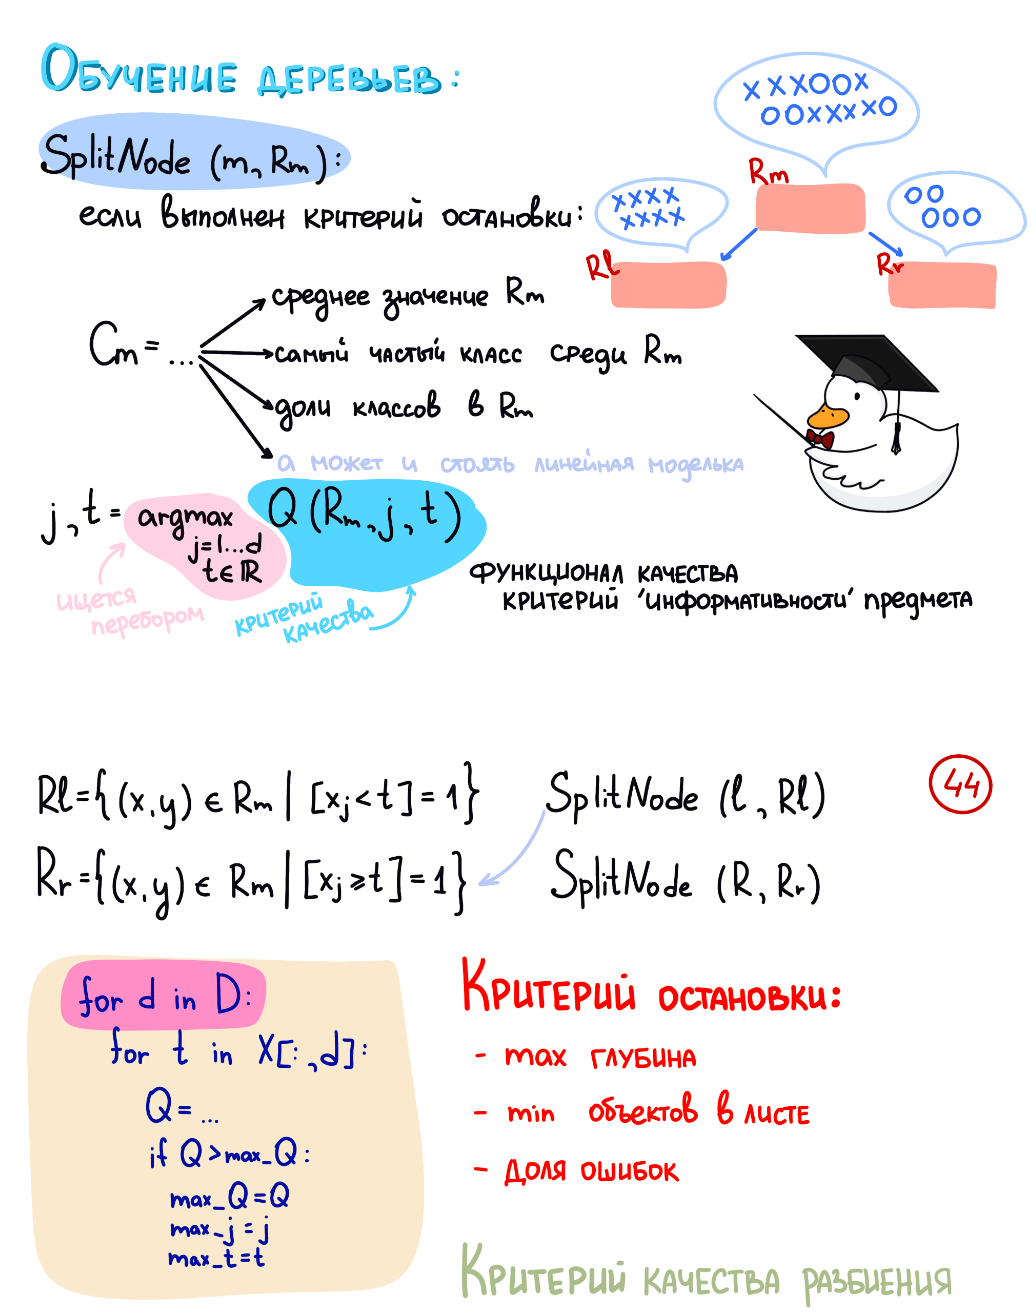

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
column_names = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                      'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring',
                      'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df_mush = pd.read_csv('agaricus-lepiota.data', header=None, names=column_names)

df_mush.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
from sklearn.preprocessing import LabelEncoder
#from tree_code import DecisionTree

# Применяем LabelEncoder
le = LabelEncoder()

df_mush = df_mush.apply(lambda col: le.fit_transform(col) if col.dtypes == 'O' else col)

y_mush = df_mush['poisonous']
X_mush = df_mush.drop(columns=['poisonous'])

# Разделим на тренировочную и тестовую выборки в соотношении 50/50
X_train, X_test, y_train, y_test = train_test_split(X_mush, y_mush, test_size=0.5, random_state=42)

# Обучаем и оцениваем качество
tree = DecisionTree(feature_types=['categorical'] * X_train.shape[1], max_depth=7)
tree.fit(X_train.values, y_train.values)

y_pred = tree.predict(X_test.values)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")



Accuracy: 1.00


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
# загружаем датафреймы
df_tic = pd.read_csv('tic-tac-toe-endgame.csv')
df_tic['V10'] = df_tic['V10'].map({'positive': 1, 'negative': 0})

df_cars = pd.read_csv('car.data')
df_cars['unacc'] = df_cars['unacc'].map({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})

df_nursery = pd.read_csv('nursery.data')
df_nursery['recommend'] = df_nursery['recommend'].map({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1})

df_mush_1 = pd.concat([X_mush, y_mush], axis=1) # приведем его к такому же виду, как и остальные датафреймы

In [ ]:
def label_encode(df):
    le = LabelEncoder()
    return df.apply(lambda col: le.fit_transform(col) if col.dtypes == 'O' else col)


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

def cross_val_accuracy(model, X, y):
    scores = cross_val_score(model, X.to_numpy(), y.to_numpy(), cv=StratifiedKFold(10, shuffle=True, random_state=777), scoring=make_scorer(accuracy_score))
    return scores.mean()

In [ ]:
from sklearn.preprocessing import OneHotEncoder


def one_hot_encode(df):

    '''
    encoder = OneHotEncoder(sparse=False)
    encoded = encoder.fit_transform(df.select_dtypes(include=['object']))
    df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(df.select_dtypes(include=['object']).columns))
    return df.drop(columns=df.select_dtypes(include=['object']).columns).join(df_encoded)'''


    encoder = OneHotEncoder()

    # Выбираем только категориальные колонки (тип 'object')
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Применяем OneHotEncoder к категориальным колонкам
    encoded = encoder.fit_transform(df[categorical_columns])

    # Преобразуем результат в DataFrame
    df_encoded = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

    # Удаляем исходные категориальные колонки и добавляем закодированные
    return df.drop(columns=categorical_columns).join(df_encoded)

In [ ]:
'''# применяем LabelEncoder
df_tic = label_encode(df_tic)
df_cars = label_encode(df_cars)
df_nursery = label_encode(df_nursery)

# Разделяем признаки
y_tic = df_tic['V10']
X_tic = df_tic.drop(columns=['V10'])

y_cars = df_cars['unacc']
X_cars = df_cars.drop(columns=['unacc'])

y_nursery = df_nursery['recommend']
X_nursery = df_nursery.drop(columns=['recommend'])
'''


In [ ]:
dfs = [df_mush_1, df_tic, df_cars, df_nursery]
result = {}

for i, df in enumerate(dfs):

    # применяем LabelEncoder
    df = label_encode(df)

    # Разделяем признаки
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # для DecisionTree, обрабатывающий все признаки как вещественные
    tree = DecisionTree(feature_types=['real'] * X.shape[1], max_depth=4)
    tree_accuracy = cross_val_accuracy(tree, X, y)

    # для DecisionTree, обрабатывающий все признаки как категориальные
    tree_cat = DecisionTree(feature_types=['categorical'] * X.shape[1], max_depth=4)
    tree_cat_accuracy = cross_val_accuracy(tree_cat, X, y)

    # для DecisionTree, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков
    X_encoded = one_hot_encode(X)
    tree_encoded = DecisionTree(feature_types=['real'] * X_encoded.shape[1], max_depth=4)
    tree_encoded_accuracy = cross_val_accuracy(tree_encoded, X, y)

    # для DecisionTreeClassifier из sklearn
    tree_sklearn = DecisionTreeClassifier(max_depth=4)
    tree_sklearn_accuracy = cross_val_accuracy(tree_sklearn, X, y)

    result[f"df_{i}"] = [tree_accuracy, tree_cat_accuracy, tree_encoded_accuracy, tree_sklearn_accuracy]

df_result = pd.DataFrame(result, index=["Tree_real", "Tree_cat", "Tree_OHE", "Tree_skl"])
df_result

,df_0,df_1,df_2,df_3
Tree_real,0.522403,0.771436,0.922990,0.999923
Tree_cat,0.955718,0.659726,0.946152,0.999923
Tree_OHE,0.522403,0.771436,0.922990,0.999923
Tree_skl,0.977844,0.756820,0.920100,0.999923


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


Ранжирование алгоритмов различается на разных наборах данных. Это говорит о том, что эффективность модели зависит от характеристик данных.

На всех наборах данных Tree_real и Tree_OHE показывают одинаковую точность. Это может быть связано с тем, что One-Hot Encoding не добавляет полезной информации для Tree_real. При этом первый датасет (df_mush_1) показал себя хуже всего при оьбработке всех признаков как вещестенных, что логично, т.к. этот датасет содержт наибольшее число категориальных признаков.

Высокие показатели для df_cars и df_nursery могут говорить о хорошей разделимости данных (у них и число признаков оказывается меньшим, чем в остальных двух)

Случайная компонента может присутствовать в виде шумов и выбросов, а также в виде разбиения на обучающую и тестовую выборки.

Да, на случайную компоненту для улучшения работы алгоритмов можно повлиять с помощью предварительной обработки данных, а также при проведении анализа важности того или иного признака.

# Как дела?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ